In [1]:
# Tests function odeint_2dn_order() which integrates
# vector-valued second-order ordinary differential equation.
#
# Function odeint_2dn_order() is defined in odeint_second_order.ipynb
# and uses scipy.integrate.odeint() internally.


%matplotlib inline
#%run odeint_second_order.ipynb # Load odeint_2nd_order() function.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc # For plot animation
from IPython.display import HTML     # To display animated plots in Jupyter notebook.

In [2]:
# Example usage of odeint_2nd_order():
# Two masses m connected with spring k loaded by force impulse


# Stiffness matrix
k = 1.0
K = np.array([[k, -k],[-k, k]])
n = K.shape[0]
print("Dimension n = {}".format(n))
print("Matrix K =")
print(K)

# Mass matrix
m = 1.0
M = m * np.eye(n)
print("Matrix M =")
print(M)

x = np.array(range(n))

# Impulse duration
t_imp = 0.5

# Impulse magnitude
F_imp = 1.0

def F(t):
    """
    Defines time-dependent vector of nodal loading forces.
    """
    res = np.zeros(n)
    if t < t_imp:
        res[0] = F_imp
    return res

Dimension n = 2
Matrix K =
[[ 1. -1.]
 [-1.  1.]]
Matrix M =
[[1. 0.]
 [0. 1.]]


In [3]:
def func(u, du, t):
    """
    Example vector-valued function returning second derivatives.
    In this case the second derivatives correspond to accelerations of the two DoFs.
    """

    # (M, K, F) = args

    # Express accelerations duu using displacements u (and possibly velocities du).
    M_inv = np.linalg.inv(M)
    return np.matmul(M_inv, F(t) - np.matmul(K, u))

Number of time points: 100


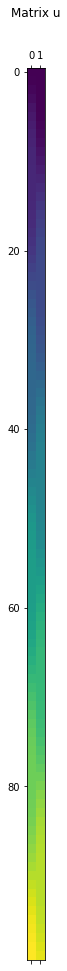

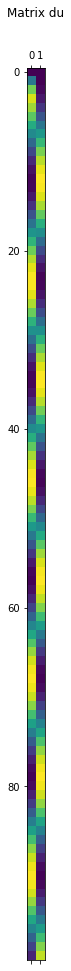

In [4]:
# duration and timestep
T = 20.0
dt = 0.2
t = np.arange(0.0, T, dt)
num_time_points = len(t)
print("Number of time points: {}".format(num_time_points))

u0 = np.zeros(n)
du0 = np.zeros(n)
u, du = odeint_2nd_order(func, u0, du0, t, args=(K, M, F))
#y = sp.integrate.odeint(f_vec, y0, t, args=(K, M, F))

plt.matshow(u)
plt.title("Matrix u")
plt.show()

plt.matshow(du)
plt.title("Matrix du")
plt.show()

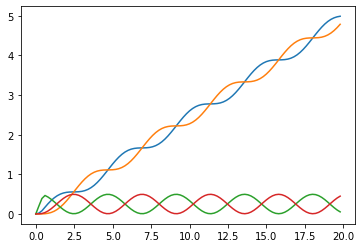

In [5]:
plt.plot(t,u[:, 0])
plt.plot(t,u[:, 1])
plt.plot(t,du[:, 0])
plt.plot(t,du[:, 1])
plt.show()


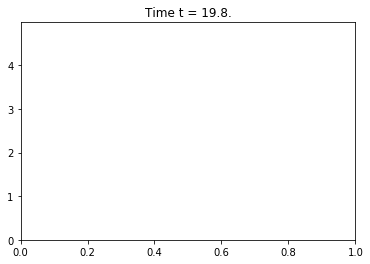

In [6]:
#%matplotlib inline
#%matplotlib notebook
# Simple animated chart
# Based on https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')

fig = plt.figure()
ax = plt.axes(xlim=(np.amin(x), np.amax(x)), ylim=(np.amin(u), np.amax(u))) # Ranges of x and y axes
line, = ax.plot([], [], lw=2) # line object with empty data
#ax.set_title('')

def init():
    line.set_data([], [])
    #ax.set_title('')
    return line,

def animate(i):
    line.set_data(x, u[i])
    ax.set_title('Time t = {}.'.format(t[i]))
    return line,

# Setting blit=True makes problems with animated title.
anim = FuncAnimation(fig, animate, init_func=init, frames=len(t), interval=100, blit=False)
anim.save('eom_odeint_animation.gif', writer='imagemagick')
anim.save('eom_odeint_animation.mp4')



In [7]:
 from IPython.display import HTML
HTML('<img src="./eom_odeint_animation.gif">')

In [8]:
from IPython.display import Video
Video("eom_odeint_animation.mp4")